In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [77]:
# from sklearn.datasets import make_regression
#https://chrisalbon.com/machine_learning/trees_and_forests/random_forest_classifier_example/

In [106]:
df_ml = pd.read_csv('Resources/ML_test2.csv')
df_ml.head()

,Row Labels,Age_less30,Age_more30,total_crimes,Gender_NA_rate,Gender_female_rate,Gender_male_rate,Unnamed: 7,FOREIGN_rate,HOMELESS_rate,MIAMI_rate
0,2015-05,10,51,61,0.001944,0.002,0.00,0.002734,0.002053,0.001440,0.002253
1,2015-06,119,476,595,0.023605,0.020,0.02,0.015625,0.024641,0.018723,0.018881
2,2015-07,121,571,692,0.017495,0.019,0.02,0.023828,0.026181,0.022948,0.021563
3,2015-08,143,652,795,0.021938,0.025,0.03,0.024805,0.026181,0.024868,0.026015
4,2015-09,138,565,703,0.024993,0.020,0.02,0.022070,0.025667,0.021219,0.023172


In [107]:
# df_ml.groupby("Booking_year_month").count().head()

In [108]:
# Drop columns that will be not used 
df_ml.drop(['Row Labels'], axis=1, inplace=True)
df_ml.head()

,Age_less30,Age_more30,total_crimes,Gender_NA_rate,Gender_female_rate,Gender_male_rate,Unnamed: 7,FOREIGN_rate,HOMELESS_rate,MIAMI_rate
0,10,51,61,0.001944,0.002,0.00,0.002734,0.002053,0.001440,0.002253
1,119,476,595,0.023605,0.020,0.02,0.015625,0.024641,0.018723,0.018881
2,121,571,692,0.017495,0.019,0.02,0.023828,0.026181,0.022948,0.021563
3,143,652,795,0.021938,0.025,0.03,0.024805,0.026181,0.024868,0.026015
4,138,565,703,0.024993,0.020,0.02,0.022070,0.025667,0.021219,0.023172


In [109]:
# import datetime as dt
# data_df['Date'] = pd.to_datetime(data_df['Date'])
# data_df['Date']=data_df['Date'].map(dt.datetime.toordinal)

In [110]:
df_ml.columns

Index(['Age_less30', 'Age_more30', 'total_crimes', 'Gender_NA_rate',
       'Gender_female_rate', 'Gender_male_rate', 'Unnamed: 7', 'FOREIGN_rate',
       'HOMELESS_rate', 'MIAMI_rate'],
      dtype='object')

In [111]:
df_ml['total_crimes'] = df_ml['total_crimes'].astype('category')

In [112]:
df_ml.head()

,Age_less30,Age_more30,total_crimes,Gender_NA_rate,Gender_female_rate,Gender_male_rate,Unnamed: 7,FOREIGN_rate,HOMELESS_rate,MIAMI_rate
0,10,51,61,0.001944,0.002,0.00,0.002734,0.002053,0.001440,0.002253
1,119,476,595,0.023605,0.020,0.02,0.015625,0.024641,0.018723,0.018881
2,121,571,692,0.017495,0.019,0.02,0.023828,0.026181,0.022948,0.021563
3,143,652,795,0.021938,0.025,0.03,0.024805,0.026181,0.024868,0.026015
4,138,565,703,0.024993,0.020,0.02,0.022070,0.025667,0.021219,0.023172


In [113]:
# Create a new column that for each row, generates a random number between 0 and 1, and
# if that value is less than or equal to .75, then sets the value of that cell as True
# and false otherwise. This is a quick and dirty way of randomly assigning some rows to
# be used as the training data and some as the test data.
df_ml['is_train'] = np.random.uniform(0, 1, len(df_ml)) <= .75

# View the top 5 rows
df_ml.head()

,Age_less30,Age_more30,total_crimes,Gender_NA_rate,Gender_female_rate,Gender_male_rate,Unnamed: 7,FOREIGN_rate,HOMELESS_rate,MIAMI_rate,is_train
0,10,51,61,0.001944,0.002,0.00,0.002734,0.002053,0.001440,0.002253,True
1,119,476,595,0.023605,0.020,0.02,0.015625,0.024641,0.018723,0.018881,True
2,121,571,692,0.017495,0.019,0.02,0.023828,0.026181,0.022948,0.021563,True
3,143,652,795,0.021938,0.025,0.03,0.024805,0.026181,0.024868,0.026015,True
4,138,565,703,0.024993,0.020,0.02,0.022070,0.025667,0.021219,0.023172,True


In [114]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test = df_ml[df_ml['is_train']==True], df_ml[df_ml['is_train']==False]

In [115]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 38
Number of observations in the test data: 12


Preprocess Data

In [116]:
# Create a list of the feature column's names
features = df_ml.columns[:10]

# View features
features

Index(['Age_less30', 'Age_more30', 'total_crimes', 'Gender_NA_rate',
       'Gender_female_rate', 'Gender_male_rate', 'Unnamed: 7', 'FOREIGN_rate',
       'HOMELESS_rate', 'MIAMI_rate'],
      dtype='object')

In [117]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y = pd.factorize(train['total_crimes'])[0]

# View target
y

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,  6, 29, 30, 31, 32,
       33, 34, 35, 36], dtype=int64)

Train The Random Forest Classifier

In [118]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
# clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf = RandomForestClassifier(random_state=0)
# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features], y)

C:\Users\BohuCyn\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Apply Classifier To Test Data

In [119]:
df_ml

,Age_less30,Age_more30,total_crimes,Gender_NA_rate,Gender_female_rate,Gender_male_rate,Unnamed: 7,FOREIGN_rate,HOMELESS_rate,MIAMI_rate,is_train
0,10,51,61,0.001944,0.002,0.00,0.002734,0.002053,0.001440,0.002253,True
1,119,476,595,0.023605,0.020,0.02,0.015625,0.024641,0.018723,0.018881,True
2,121,571,692,0.017495,0.019,0.02,0.023828,0.026181,0.022948,0.021563,True
3,143,652,795,0.021938,0.025,0.03,0.024805,0.026181,0.024868,0.026015,True
4,138,565,703,0.024993,0.020,0.02,0.022070,0.025667,0.021219,0.023172,True
5,125,627,752,0.023327,0.025,0.02,0.021875,0.030287,0.023428,0.024084,True
6,106,505,611,0.021661,0.019,0.02,0.016992,0.017967,0.019779,0.019847,True
7,108,493,601,0.018884,0.015,0.02,0.021680,0.022074,0.019299,0.019149,False
8,105,423,528,0.016662,0.013,0.02,0.017188,0.024641,0.016515,0.016521,True
9,128,462,590,0.016940,0.020,0.02,0.017578,0.029261,0.015554,0.019900,True


In [120]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
clf.predict(test[features])

array([14, 21, 16, 21,  6,  7, 23, 27, 28, 34, 20,  6], dtype=int64)

In [121]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[0. , 0.1, 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0.1, 0. , 0. , 0. ,
        0. , 0.2, 0. , 0. , 0. , 0.1, 0. , 0.1, 0.1, 0. , 0. , 0. , 0. ,
        0. , 0. , 0.1, 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0.1, 0.1, 0. , 0.1,
        0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0.1, 0.2, 0. , 0. , 0. , 0.2, 0.1, 0.1, 0. , 0. , 0. ,
        0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.3, 0. , 0. , 0. , 0. ,
        0. , 0. , 0.2, 0. , 0.1, 0.2, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0. , 0. , 0.1, 0. ,
        0. , 0

Evaluate Classifier

In [125]:
test['total_crimes'].head()

7     601
10    676
14    632
25    658
26    617
Name: total_crimes, dtype: category
Categories (47, int64): [61, 237, 487, 528, ..., 738, 739, 752, 795]

Create a confusion matrix

In [127]:
# Create confusion matrix
pd.crosstab(test['total_crimes'], preds, rownames=['Actual Crime'], colnames=['Predicted Crime'])

TypeError: crosstab() missing 1 required positional argument: 'columns'

In [128]:
list(zip(train[features], clf.feature_importances_))

[('Age_less30', 0.07896474784617541),
 ('Age_more30', 0.12243481283289105),
 ('total_crimes', 0.12854606945599922),
 ('Gender_NA_rate', 0.10961508195978914),
 ('Gender_female_rate', 0.06831211612035476),
 ('Gender_male_rate', 0.012379607481427786),
 ('Unnamed: 7', 0.14423066576738705),
 ('FOREIGN_rate', 0.12669944721272408),
 ('HOMELESS_rate', 0.0932887118953442),
 ('MIAMI_rate', 0.11552873942790746)]

In [153]:
#Machine LEarning 
# based on Stubeer_foam (1-6)

In [147]:
df_ml = pd.read_csv('Resources/ML_test4.csv')
df_ml.head()

,Date,Crime_nber,Average of Age
0,1,61,42.934426
1,2,595,42.157983
2,3,692,44.794798
3,4,795,43.605031
4,5,703,43.975818


In [148]:
# Assign the data to X and y

X = df_ml[["Crime_nber", "Average of Age"]]
y = df_ml["Date"].values.reshape(-1, 1)
print(X.shape, y.shape)

(50, 2) (50, 1)


In [149]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [150]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [151]:
# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5983502829734815
Testing Score: 0.7024471555443497


Text(0.5, 1.0, 'Residual Plot')

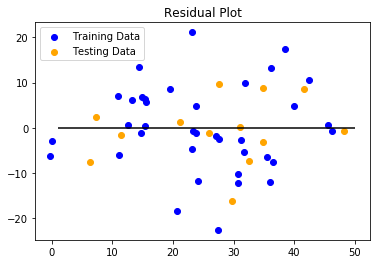

In [152]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION